# **Segundo examen - Análsiis de Datos con Python**
## Maestría en Matemáticas Aplicadas e Industriales
## Alumno: Brandon Eduardo Antonio Gómez

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 1
Cargue los datos de incidentes viales reportados por C5 (Viales_2022_2024.csv en Github) y realice lo siguiente:

In [322]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv'
df = pd.read_csv(ruta, parse_dates=True)
df.head()

fecha_creacion hora_creacion tipo_incidente_c4           incidente_c4  \
0     2021-12-29      23:21:20         Lesionado            Atropellado   
1     2022-01-01      09:51:53         Accidente           Motociclista   
2     2022-01-01      09:56:54         Accidente  Choque sin lesionados   
3     2021-12-31      21:47:36         Accidente           Motociclista   
4     2022-01-01      03:43:56         Accidente           Motociclista   

     alcaldia_inicio  clas_con_f_alarma      tipo_entrada  alcaldia_catalogo  \
0                NaN  URGENCIAS MEDICAS  BOTÓN DE AUXILIO         Cuauhtémoc   
1         CUAUHTEMOC  URGENCIAS MEDICAS             RADIO     Miguel Hidalgo   
2  GUSTAVO A. MADERO         EMERGENCIA  BOTÓN DE AUXILIO  Gustavo A. Madero   
3         XOCHIMILCO  URGENCIAS MEDICAS  BOTÓN DE AUXILIO         Xochimilco   
4         IZTAPALAPA  URGENCIAS MEDICAS  BOTÓN DE AUXILIO         Iztapalapa   

            colonia_catalogo   longitud    latitud  
0                 Roma Norte -99.163670  19.421610  
1                   Tlaxpana -99.165781  19.443649  
2               C T M Aragon -99.054690  19.451630  
3  Cerrillos Primera Seccion -99.020370  19.245690  
4               Celoalliotli -99.071140  19.291070

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168087 entries, 0 to 168086
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fecha_creacion     168087 non-null  object 
 1   hora_creacion      168087 non-null  object 
 2   tipo_incidente_c4  168087 non-null  object 
 3   incidente_c4       168087 non-null  object 
 4   alcaldia_inicio    168075 non-null  object 
 5   clas_con_f_alarma  168087 non-null  object 
 6   tipo_entrada       168085 non-null  object 
 7   alcaldia_catalogo  167878 non-null  object 
 8   colonia_catalogo   164415 non-null  object 
 9   longitud           168087 non-null  float64
 10  latitud            168087 non-null  float64
dtypes: float64(2), object(9)
memory usage: 14.1+ MB


Debido a que se tienen 168087 registros, conviene utilizar un chunksize, por ejemplo de 1000

In [324]:
df.columns

Index(['fecha_creacion', 'hora_creacion', 'tipo_incidente_c4', 'incidente_c4',
       'alcaldia_inicio', 'clas_con_f_alarma', 'tipo_entrada',
       'alcaldia_catalogo', 'colonia_catalogo', 'longitud', 'latitud'],
      dtype='object')

dado que se pide analizar las columnas 'tipo_incidente_c4' y 'incidente_c4', se cambiará por un nombre más corto

In [325]:
df = df.rename(columns={'tipo_incidente_c4': 'tipo incidente', 'incidente_c4': 'incidente'})
df.columns

Index(['fecha_creacion', 'hora_creacion', 'tipo incidente', 'incidente',
       'alcaldia_inicio', 'clas_con_f_alarma', 'tipo_entrada',
       'alcaldia_catalogo', 'colonia_catalogo', 'longitud', 'latitud'],
      dtype='object')

## a) Obtenga un Dataframe con los tipos de incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

La columna del tipo de incidente es: 'tipo_incidente_c4'

In [326]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv'
df = pd.read_csv(ruta, chunksize=1000)
df

In [327]:
total = pd.Series([], dtype='int64')

for chunk in df:
    total = total.add(chunk['tipo_incidente_c4'].value_counts(), fill_value=0)
    total = total.sort_values(ascending=False)
tipo_incidente = pd.DataFrame(total, columns=['Frecuencia'])
tipo_incidente

Frecuencia
tipo_incidente_c4              
Accidente              150097.0
Lesionado               17356.0
Cadáver                   353.0
Detención ciudadana       120.0
Mi Calle                  105.0
Sismo                      36.0
Mi Taxi                    20.0

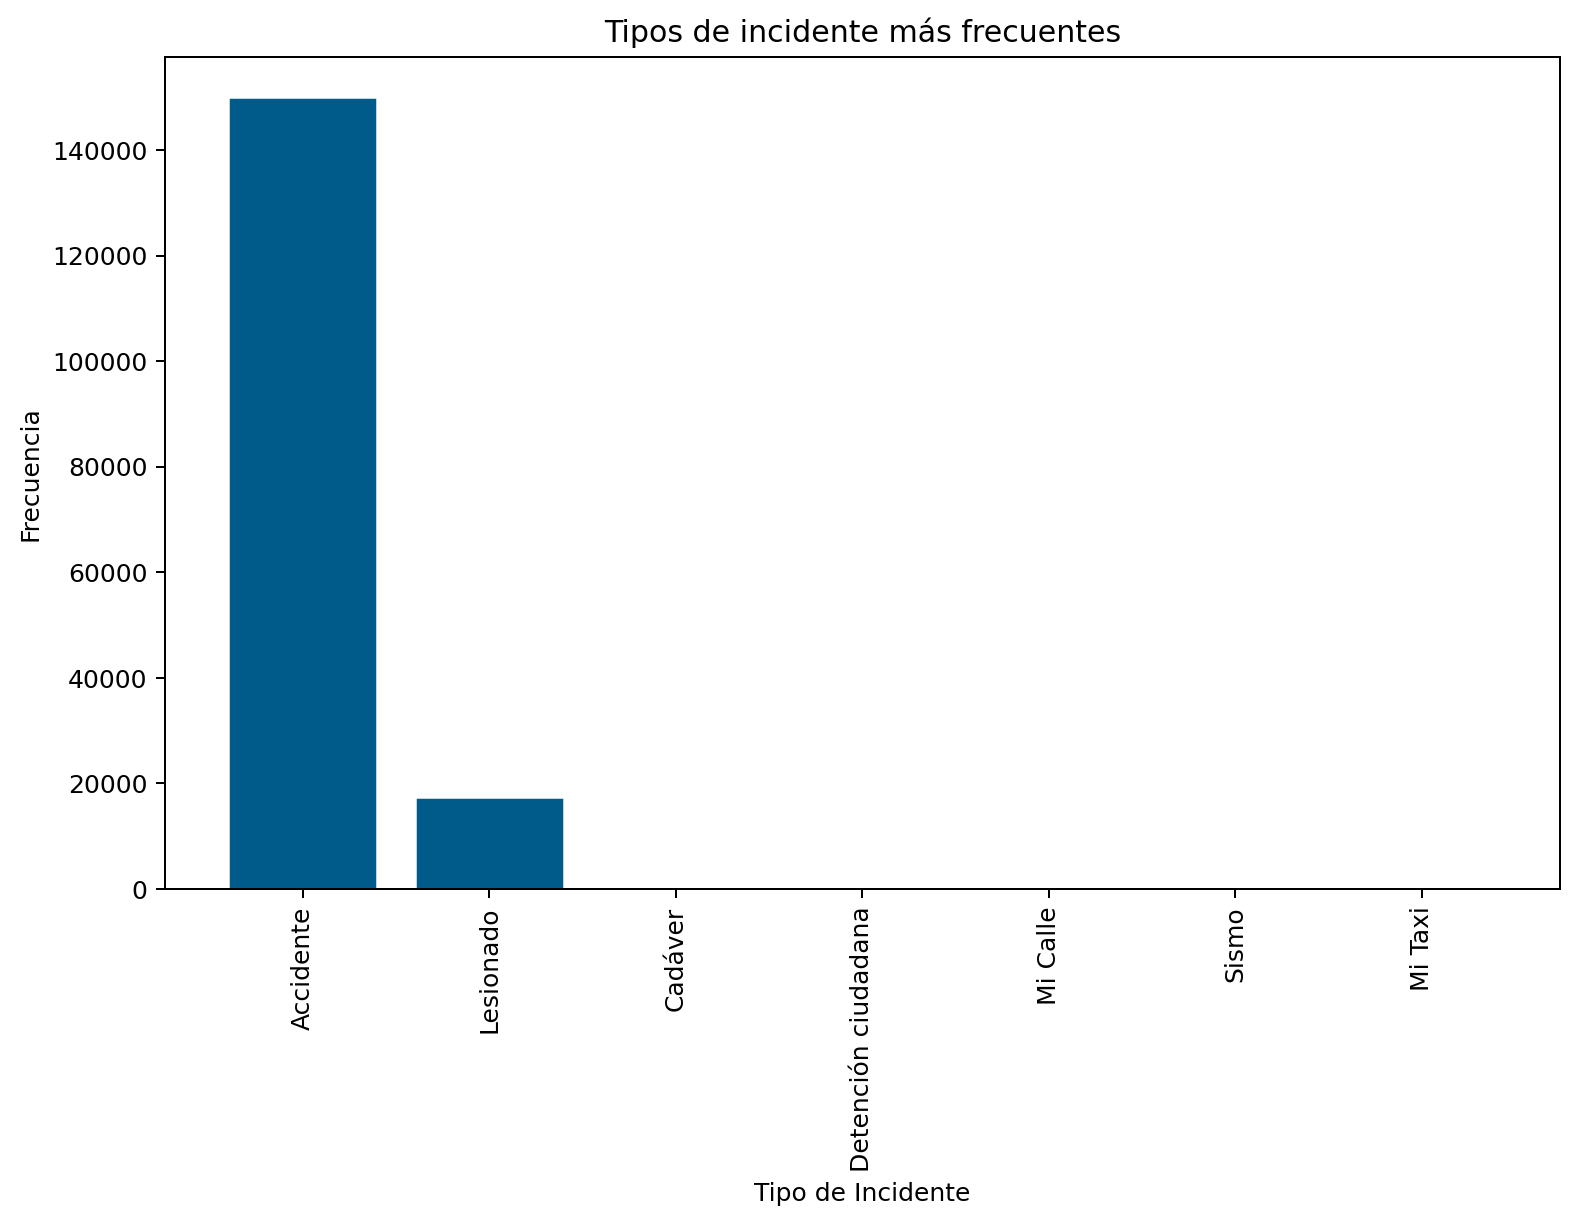

In [328]:
tipo_incidente = tipo_incidente.sort_values(by='Frecuencia', ascending=False)

plt.figure(figsize=(10, 6), dpi=180)
plt.bar(tipo_incidente.index, tipo_incidente['Frecuencia'],
        facecolor = '#005B8B', edgecolor = 'white')
plt.title('Tipos de incidente más frecuentes')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

El tipo de incidente más frecuente es: por accidente, seguido de lesionado, los demás tipos de incidentes prácticamente son despreciables respecto a los más frecuentes

## b) Obtenga un Dataframe con los incidentes y su frecuencia. Obtenga un gráfico que ilustre esto.

Ahora la columna de interés es: 'incidente_c4'

In [329]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv'
df = pd.read_csv(ruta, chunksize=1000)
df

total_incidente = pd.Series([], dtype='int64')

for chunk in df:
    total_incidente = total_incidente.add(chunk['incidente_c4'].value_counts(), fill_value=0)
    total_incidente = total_incidente.sort_values(ascending=False)
incidente = pd.DataFrame(total_incidente, columns=['Frecuencia'])
incidente


Frecuencia
incidente_c4                                
Choque sin lesionados                77067.0
Choque con lesionados                48834.0
Atropellado                          17559.0
Motociclista                         16753.0
Volcadura                             3010.0
Ciclista                              2241.0
Persona atrapada / desbarrancada       914.0
Vehículo atrapadovarado                700.0
Choque con prensados                   334.0
Accidente automovilístico              270.0
Incidente de tránsito                  125.0
Otros                                   86.0
Vehiculo desbarrancado                  80.0
Monopatín                               72.0
Ferroviario                             32.0
Persona atropellada                     10.0

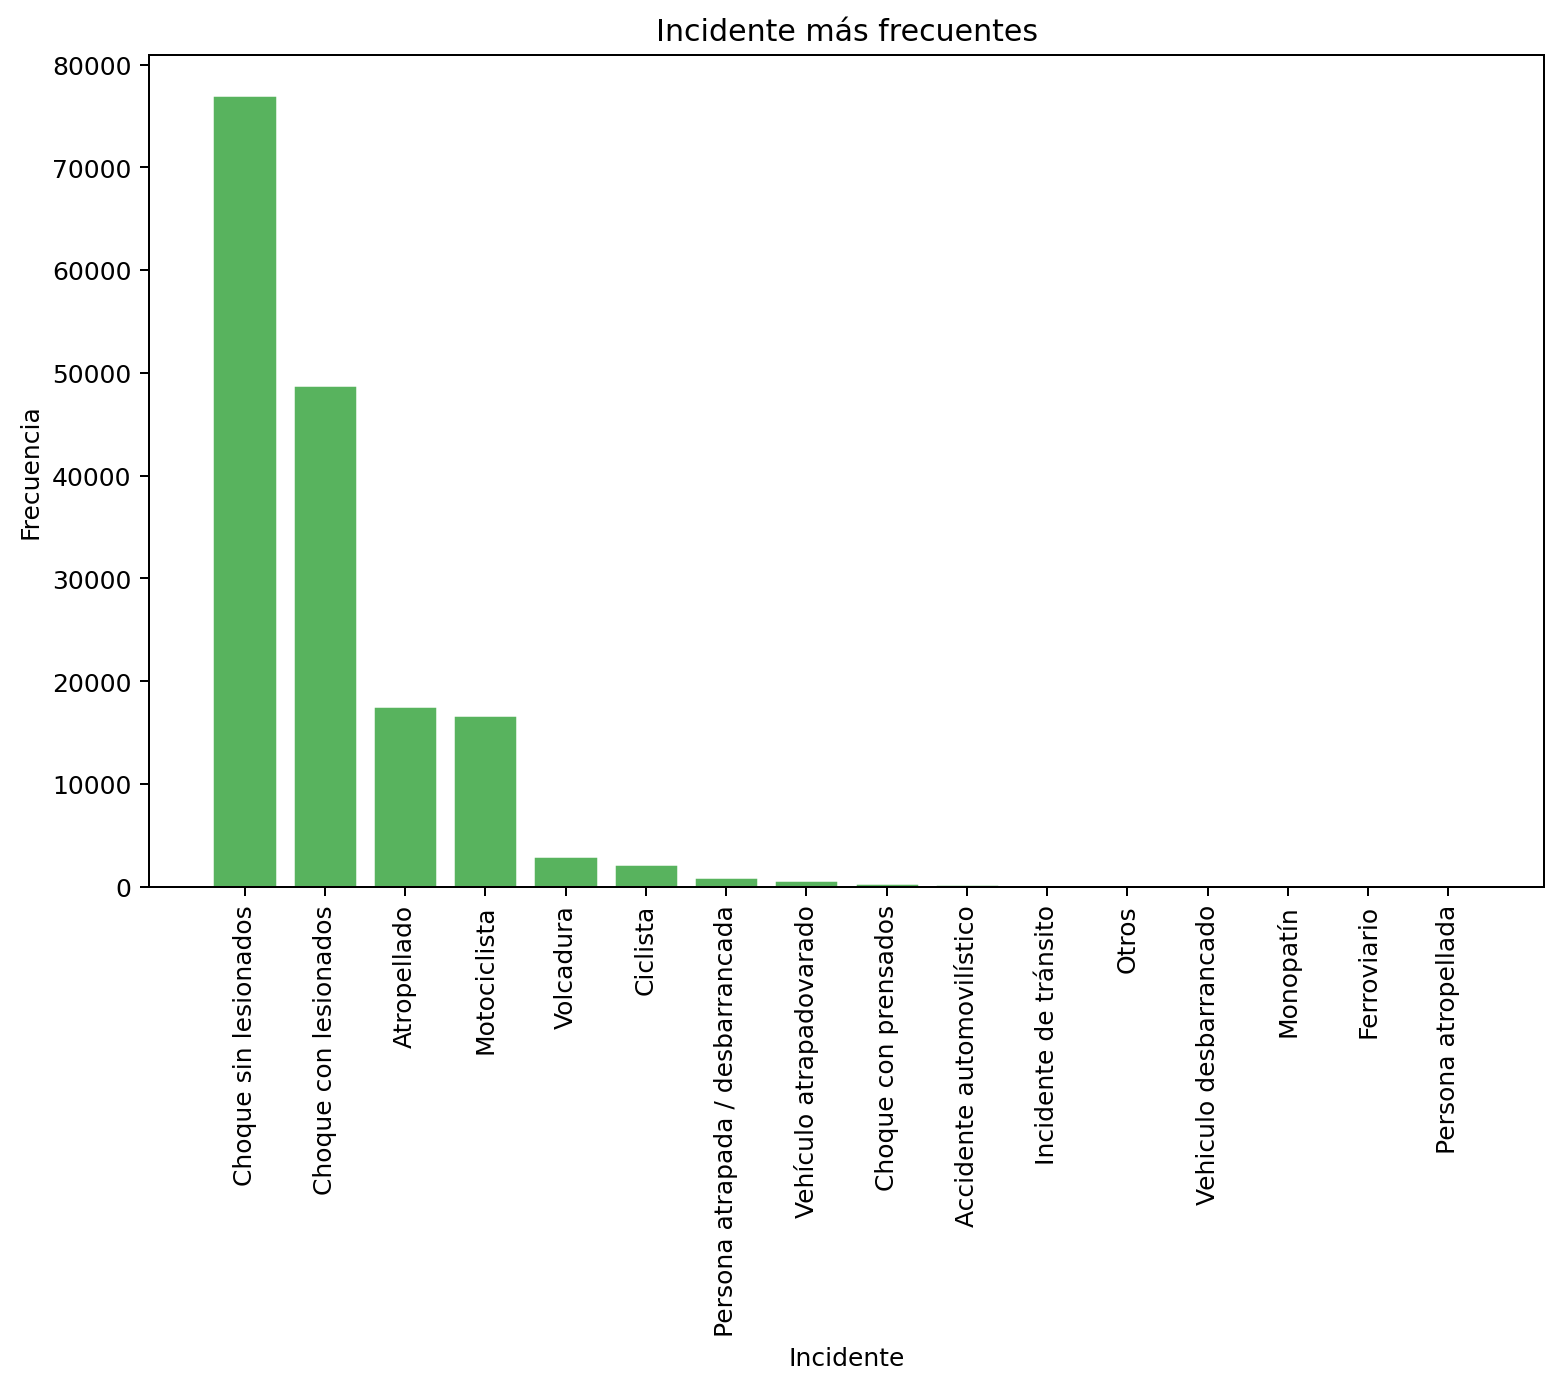

In [330]:
incidente = incidente.sort_values(by='Frecuencia', ascending=False)

plt.figure(figsize=(10, 6), dpi=180)
plt.bar(incidente.index, incidente['Frecuencia'],
        facecolor = '#008B09A7', edgecolor = 'white')
plt.title('Incidente más frecuentes')
plt.xlabel('Incidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

los incidentes más frecuentes en orden decendente son: choque sin lesionados, choque con lesionados, atropellado y motociclista

c) Obtenga un gráfico de barras que iluste el número de incidentes por alcaldía (columna 'alcaldia_inicio').

In [331]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv'
df = pd.read_csv(ruta, chunksize=1000)
df

incidente_alcaldia = pd.Series([], dtype='int64')

for chunk in df:
    incidente_alcaldia = incidente_alcaldia.add(chunk['alcaldia_inicio'].value_counts(), fill_value=0) # fill_value=0 para rellenar valores faltantes NaN
    incidente_alcaldia = incidente_alcaldia.sort_values(ascending=False)
incidente_por_alcaldia = pd.DataFrame(incidente_alcaldia, columns=['Frecuencia'])
incidente_por_alcaldia

Frecuencia
alcaldia_inicio                   
IZTAPALAPA                 27437.0
GUSTAVO A. MADERO          18846.0
CUAUHTEMOC                 17461.0
COYOACAN                   12363.0
VENUSTIANO CARRANZA        12217.0
BENITO JUAREZ              12147.0
TLALPAN                    12092.0
ALVARO OBREGON             11368.0
MIGUEL HIDALGO             10309.0
IZTACALCO                   8206.0
AZCAPOTZALCO                6998.0
XOCHIMILCO                  6545.0
TLAHUAC                     5018.0
CUAJIMALPA DE MORELOS       3205.0
LA MAGDALENA CONTRERAS      2680.0
MILPA ALTA                  1183.0

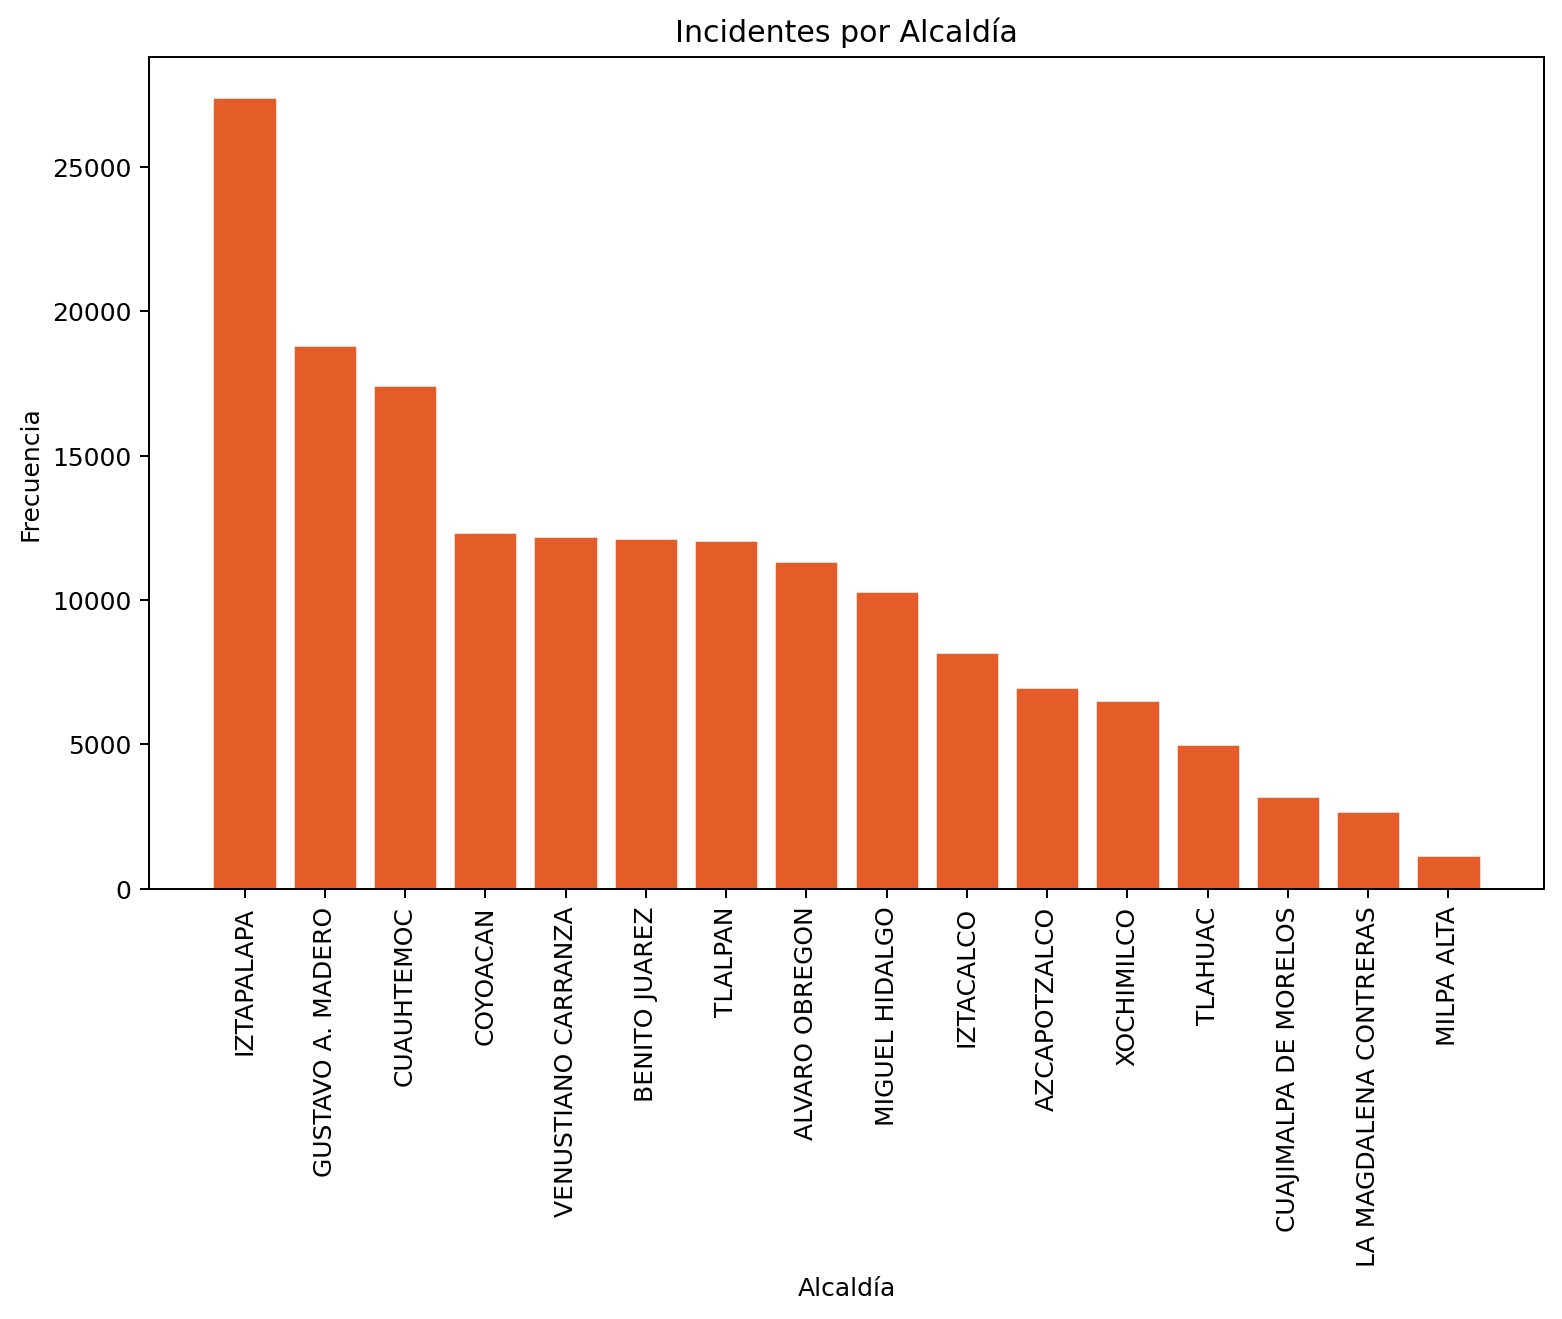

In [332]:
incidente_por_alcaldia = incidente_por_alcaldia.sort_values(by='Frecuencia', ascending=False)

plt.figure(figsize=(10, 6), dpi=180)
plt.bar(incidente_por_alcaldia.index, incidente_por_alcaldia['Frecuencia'],
        facecolor = '#E1470BE0', edgecolor = 'white')
plt.title('Incidentes por Alcaldía')
plt.xlabel('Alcaldía')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

el mayor número de incidentes se da en la alcaldía Iztapalapa

## d) Obtenga una serie temporal con el número de atropellados por semana y grafique la serie.

In [333]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Viales_2022_2024.csv'
df = pd.read_csv(ruta, parse_dates=True, index_col='fecha_creacion')
df.head()

hora_creacion tipo_incidente_c4           incidente_c4  \
fecha_creacion                                                          
2021-12-29          23:21:20         Lesionado            Atropellado   
2022-01-01          09:51:53         Accidente           Motociclista   
2022-01-01          09:56:54         Accidente  Choque sin lesionados   
2021-12-31          21:47:36         Accidente           Motociclista   
2022-01-01          03:43:56         Accidente           Motociclista   

                  alcaldia_inicio  clas_con_f_alarma      tipo_entrada  \
fecha_creacion                                                           
2021-12-29                    NaN  URGENCIAS MEDICAS  BOTÓN DE AUXILIO   
2022-01-01             CUAUHTEMOC  URGENCIAS MEDICAS             RADIO   
2022-01-01      GUSTAVO A. MADERO         EMERGENCIA  BOTÓN DE AUXILIO   
2021-12-31             XOCHIMILCO  URGENCIAS MEDICAS  BOTÓN DE AUXILIO   
2022-01-01             IZTAPALAPA  URGENCIAS MEDICAS  BOTÓN DE AUXILIO   

                alcaldia_catalogo           colonia_catalogo   longitud  \
fecha_creacion                                                            
2021-12-29             Cuauhtémoc                 Roma Norte -99.163670   
2022-01-01         Miguel Hidalgo                   Tlaxpana -99.165781   
2022-01-01      Gustavo A. Madero               C T M Aragon -99.054690   
2021-12-31             Xochimilco  Cerrillos Primera Seccion -99.020370   
2022-01-01             Iztapalapa               Celoalliotli -99.071140   

                  latitud  
fecha_creacion             
2021-12-29      19.421610  
2022-01-01      19.443649  
2022-01-01      19.451630  
2021-12-31      19.245690  
2022-01-01      19.291070

In [334]:
df.columns

Index(['hora_creacion', 'tipo_incidente_c4', 'incidente_c4', 'alcaldia_inicio',
       'clas_con_f_alarma', 'tipo_entrada', 'alcaldia_catalogo',
       'colonia_catalogo', 'longitud', 'latitud'],
      dtype='object')

In [335]:
df['incidente_c4'].unique()

array(['Atropellado', 'Motociclista', 'Choque sin lesionados',
       'Choque con lesionados', 'Choque con prensados', 'Volcadura',
       'Vehiculo desbarrancado', 'Persona atrapada / desbarrancada',
       'Ciclista', 'Vehículo atrapadovarado', 'Otros',
       'Accidente automovilístico', 'Incidente de tránsito',
       'Ferroviario', 'Monopatín', 'Persona atropellada'], dtype=object)

In [336]:
df['incidente_c4'][0]

/tmp/ipython-input-336-938620610.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['incidente_c4'][0]


'Atropellado'

como la primer [0] entrada es Atropellado

Incidentes por hora

In [337]:
df.groupby(['incidente_c4' ]).sum()

hora_creacion  \
incidente_c4                                                                          
Accidente automovilístico         01:16:3816:45:0514:05:3806:24:3823:09:2120:09:...   
Atropellado                       23:21:2009:05:5318:42:3020:49:4003:43:2806:39:...   
Choque con lesionados             17:12:4520:59:5922:10:4222:12:1522:15:4823:43:...   
Choque con prensados              00:10:1212:40:2418:08:1020:46:5902:41:4717:10:...   
Choque sin lesionados             09:56:5420:11:3421:04:0721:31:3921:47:3522:04:...   
Ciclista                          22:48:4408:24:5409:24:0908:24:1216:22:0219:45:...   
Ferroviario                       20:46:5220:46:0217:49:4217:51:0210:39:2010:33:...   
Incidente de tránsito             18:35:2515:19:5309:36:3819:31:2201:34:5401:23:...   
Monopatín                         17:48:3819:54:4915:08:4413:24:4821:27:5921:26:...   
Motociclista                      09:51:5321:47:3603:43:5602:51:1610:38:5616:54:...   
Otros                             09:53:0410:28:4404:53:2416:25:0118:56:3403:50:...   
Persona atrapada / desbarrancada  10:25:2416:39:1819:30:4707:07:1812:01:3819:39:...   
Persona atropellada               19:15:2313:53:1414:40:2114:26:5014:53:3012:56:...   
Vehiculo desbarrancado            01:23:5912:36:4921:03:3702:33:3611:38:1814:33:...   
Vehículo atrapadovarado           14:54:0216:00:0219:09:0812:52:3900:41:5513:26:...   
Volcadura                         00:24:2501:15:1518:31:2823:44:4323:49:3200:49:...   

                                                                  tipo_incidente_c4  \
incidente_c4                                                                          
Accidente automovilístico         CadáverCadáverCadáverCadáverCadáverDetención c...   
Atropellado                       LesionadoLesionadoLesionadoLesionadoLesionadoL...   
Choque con lesionados             AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Choque con prensados              AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Choque sin lesionados             AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Ciclista                          AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Ferroviario                       AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Incidente de tránsito             Mi CalleMi CalleMi TaxiMi CalleMi CalleMi Call...   
Monopatín                         AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Motociclista                      AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Otros                             AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Persona atrapada / desbarrancada  AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Persona atropellada               SismoSismoSismoSismoSismoSismoSismoSismoSismoS...   
Vehiculo desbarrancado            AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Vehículo atrapadovarado           AccidenteAccidenteAccidenteAccidenteAccidenteA...   
Volcadura                         AccidenteAccidenteAccidenteAccidenteAccidenteA...   

                                                                    alcaldia_inicio  \
incidente_c4                                                                          
Accidente automovilístico         IZTAPALAPAIZTAPALAPATLALPANGUSTAVO A. MADEROXO...   
Atropellado                       IZTAPALAPAXOCHIMILCOCUAUHTEMOCGUSTAVO A. MADER...   
Choque con lesionados             IZTAPALAPAGUSTAVO A. MADEROTLAHUACTLAHUACIZTAC...   
Choque con prensados              IZTAPALAPATLALPANCUAJIMALPA DE MORELOSCOYOACAN...   
Choque sin lesionados             GUSTAVO A. MADEROIZTAPALAPAGUSTAVO A. MADEROIZ...   
Ciclista                          IZTACALCOCUAUHTEMOCCUAUHTEMOCIZTACALCOCUAUHTEM...   
Ferroviario                       GUSTAVO A. MADEROGUSTAVO A. MADEROCOYOACANCOYO...   
Incidente de tránsito             COYOACANMIGUEL HIDALGOGUSTAVO A. MADEROIZTACAL...   
Monopatín                         IZTAPALAPAALVARO OBREGONMIGUEL H

In [338]:
df.groupby(['incidente_c4', 'tipo_incidente_c4']).sum()


hora_creacion  \
incidente_c4                     tipo_incidente_c4                                                        
Accidente automovilístico        Cadáver              01:16:3816:45:0514:05:3806:24:3823:09:2118:40:...   
                                 Detención ciudadana  20:09:3916:59:0013:24:0109:57:3308:29:2718:54:...   
Atropellado                      Cadáver              10:48:2209:10:5010:14:1718:51:0307:16:4623:52:...   
                                 Detención ciudadana  01:16:5120:46:1918:21:1318:21:5822:33:1421:42:...   
                                 Lesionado            23:21:2009:05:5318:42:3020:49:4003:43:2806:39:...   
Choque con lesionados            Accidente            17:12:4520:59:5922:10:4222:12:1522:15:4823:43:...   
                                 Sismo                19:35:2221:51:3810:53:2620:35:2806:56:0613:06:...   
Choque con prensados             Accidente            00:10:1212:40:2418:08:1020:46:5902:41:4717:10:...   
Choque sin lesionados            Accidente            09:56:5420:11:3421:04:0721:31:3921:47:3522:04:...   
Ciclista                         Accidente            22:48:4408:24:5409:24:0908:24:1216:22:0219:45:...   
Ferroviario                      Accidente            20:46:5220:46:0217:49:4217:51:0210:39:2010:33:...   
Incidente de tránsito            Mi Calle             18:35:2515:19:5319:31:2201:34:5401:23:1509:30:...   
                                 Mi Taxi              09:36:3820:55:1421:23:2714:31:2312:24:5215:09:...   
Monopatín                        Accidente            17:48:3819:54:4915:08:4413:24:4821:27:5921:26:...   
Motociclista                     Accidente            09:51:5321:47:3603:43:5602:51:1610:38:5616:54:...   
Otros                            Accidente            09:53:0410:28:4404:53:2416:25:0118:56:3403:50:...   
Persona atrapada / desbarrancada Accidente            10:25:2416:39:1819:30:4707:07:1812:01:3819:39:...   
Persona atropellada              Sismo                19:15:2313:53:1414:40:2114:26:5014:53:3012:56:...   
Vehiculo desbarrancado           Accidente            01:23:5912:36:4921:03:3702:33:3611:38:1814:33:...   
Vehículo atrapadovarado          Accidente            14:54:0216:00:0219:09:0812:52:3900:41:5513:26:...   
Volcadura                        Accidente            00:24:2501:15:1518:31:2823:44:4323:49:3200:49:...   

                                                                                        alcaldia_inicio  \
incidente_c4                     tipo_incidente_c4                                                        
Accidente automovilístico        Cadáver              IZTAPALAPAIZTAPALAPATLALPANGUSTAVO A. MADEROXO...   
                                 Detención ciudadana  IZTAPALAPABENITO JUAREZGUSTAVO A. MADEROIZTACA...   
Atropellado                      Cadáver              BENITO JUAREZIZTAPALAPAIZTAPALAPAMIGUEL HIDALG...   
                                 Detención ciudadana  IZTAPALAPAIZTAPALAPAIZTAPALAPAIZTAPALAPAIZTAPA...   
                                 Lesionado            IZTAPALAPAXOCHIMILCOCUAUHTEMOCGUSTAVO A. MADER...   
Choque con lesionados            Accidente            IZTAPALAPAGUSTAVO A. MADEROTLAHUACTLAHUACIZTAC...   
                                 Sismo                CUAUHTEMOCIZTAPALAPAVENUSTIANO CARRANZAIZTAPAL...   
Choque con prensados             Accidente            IZTAPALAPATLALPANCUAJIMALPA DE MORELOSCOYOACAN...   
Choque sin lesionados            Accidente            GUSTAVO A. MADEROIZTAPALAPAGUSTAVO A. MADEROIZ...   
Ciclista                         Accidente            IZTACALCOCUAUHTEMOCCUAUHTEMOCIZTACALCOCUAUHTEM...   
Ferroviario                      Accidente            GUSTAVO A. MADEROGUSTAVO A. MADEROCOYOACANCOYO...   
Incidente de tránsito            Mi Calle             COYOACANMIGUEL HIDALGOIZTACALCOCUAUHTEMOCIZTAP...   
                                 Mi Taxi              GUSTAVO A. MADEROIZTAPALAPAIZTAPALAPACUAUHTEMO...   
Monopatín              

In [339]:
atropellados = df.groupby(['incidente_c4', 'tipo_incidente_c4']).sum().loc['Atropellado']
atropellados


hora_creacion  \
tipo_incidente_c4                                                        
Cadáver              10:48:2209:10:5010:14:1718:51:0307:16:4623:52:...   
Detención ciudadana  01:16:5120:46:1918:21:1318:21:5822:33:1421:42:...   
Lesionado            23:21:2009:05:5318:42:3020:49:4003:43:2806:39:...   

                                                       alcaldia_inicio  \
tipo_incidente_c4                                                        
Cadáver              BENITO JUAREZIZTAPALAPAIZTAPALAPAMIGUEL HIDALG...   
Detención ciudadana  IZTAPALAPAIZTAPALAPAIZTAPALAPAIZTAPALAPAIZTAPA...   
Lesionado            IZTAPALAPAXOCHIMILCOCUAUHTEMOCGUSTAVO A. MADER...   

                                                     clas_con_f_alarma  \
tipo_incidente_c4                                                        
Cadáver              EMERGENCIAEMERGENCIAEMERGENCIAEMERGENCIAEMERGE...   
Detención ciudadana  DELITODELITODELITODELITODELITODELITODELITODELI...   
Lesionado            URGENCIAS MEDICASURGENCIAS MEDICASURGENCIAS ME...   

                                                          tipo_entrada  \
tipo_incidente_c4                                                        
Cadáver              LLAMADA DEL 911LLAMADA DEL 911LLAMADA DEL 911B...   
Detención ciudadana  LLAMADA DEL 911LLAMADA DEL 911LLAMADA DEL 911L...   
Lesionado            BOTÓN DE AUXILIOBOTÓN DE AUXILIOBOTÓN DE AUXIL...   

                                                     alcaldia_catalogo  \
tipo_incidente_c4                                                        
Cadáver              Benito JuárezIztapalapaIztapalapaMiguel Hidalg...   
Detención ciudadana  IztapalapaIztapalapaIztapalapaIztapalapaIztapa...   
Lesionado            CuauhtémocIztapalapaXochimilcoCuauhtémocGustav...   

                                                      colonia_catalogo  \
tipo_incidente_c4                                                        
Cadáver              San Pedro De Los PinosErmita ZaragozaPueblo Sa...   
Detención ciudadana  San Miguel 8va AmpliacionCasa BlancaBarrio San...   
Lesionado            Roma NorteSanta Martha Acatitla NortePueblo Sa...   

                         longitud        latitud  
tipo_incidente_c4                                 
Cadáver             -1.318529e+04    2576.070816  
Detención ciudadana -6.937936e+03    1356.390211  
Lesionado           -1.720486e+06  336478.223610

In [340]:
filtro = (df['incidente_c4'] == 'Atropellado')
df[filtro]

hora_creacion tipo_incidente_c4 incidente_c4  \
fecha_creacion                                                
2021-12-29          23:21:20         Lesionado  Atropellado   
2022-01-01          09:05:53         Lesionado  Atropellado   
2022-01-01          18:42:30         Lesionado  Atropellado   
2021-12-31          20:49:40         Lesionado  Atropellado   
2022-01-01          03:43:28         Lesionado  Atropellado   
...                      ...               ...          ...   
2024-02-29          13:28:35         Lesionado  Atropellado   
2024-02-29          15:10:29         Lesionado  Atropellado   
2024-02-29          17:05:25         Lesionado  Atropellado   
2024-02-29          17:12:49         Lesionado  Atropellado   
2024-02-29          19:48:51         Lesionado  Atropellado   

                      alcaldia_inicio  clas_con_f_alarma      tipo_entrada  \
fecha_creacion                                                               
2021-12-29                        NaN  URGENCIAS MEDICAS  BOTÓN DE AUXILIO   
2022-01-01                 IZTAPALAPA  URGENCIAS MEDICAS  BOTÓN DE AUXILIO   
2022-01-01                 XOCHIMILCO  URGENCIAS MEDICAS  BOTÓN DE AUXILIO   
2021-12-31                 CUAUHTEMOC  URGENCIAS MEDICAS   LLAMADA DEL 911   
2022-01-01          GUSTAVO A. MADERO  URGENCIAS MEDICAS   LLAMADA DEL 911   
...                               ...                ...               ...   
2024-02-29                 CUAUHTEMOC  URGENCIAS MEDICAS   LLAMADA DEL 911   
2024-02-29                 CUAUHTEMOC  URGENCIAS MEDICAS             RADIO   
2024-02-29                  IZTACALCO  URGENCIAS MEDICAS   LLAMADA DEL 911   
2024-02-29                 IZTAPALAPA  URGENCIAS MEDICAS   LLAMADA DEL 911   
2024-02-29      CUAJIMALPA DE MORELOS  URGENCIAS MEDICAS   LLAMADA DEL 911   

                    alcaldia_catalogo               colonia_catalogo  \
fecha_creacion                                                         
2021-12-29                 Cuauhtémoc                     Roma Norte   
2022-01-01                 Iztapalapa    Santa Martha Acatitla Norte   
2022-01-01                 Xochimilco   Pueblo Santa Maria Nativitas   
2021-12-31                 Cuauhtémoc                         Centro   
2022-01-01          Gustavo A. Madero  Lindavista Vallejo 3a Seccion   
...                               ...                            ...   
2024-02-29                 Cuauhtémoc                Paulino Navarro   
2024-02-29                 Cuauhtémoc                         Centro   
2024-02-29                  Iztacalco              Agricola Oriental   
2024-02-29                 Iztapalapa                   El Santuario   
2024-02-29      Cuajimalpa de Morelos         Lomas De Vista Hermosa   

                 longitud    latitud  
fecha_creacion                        
2021-12-29     -99.163670  19.421610  
2022-01-01     -99.021140  19.383800  
2022-01-01     -99.094200  19.249000  
2021-12-31     -99.131386  19.425772  
2022-01-01     -99.146321  19.493426  
...                   ...        ...  
2024-02-29     -99.129337  19.412684  
2024-02-29     -99.126386  19.423076  
2024-02-29     -99.068306  19.393745  
2024-02-29     -99.096620  19.355595  
2024-02-29     -99.262997  19.375108  

[17559 rows x 10 columns]

In [341]:
atropellados = df[filtro]['incidente_c4']
atropellados

fecha_creacion
2021-12-29    Atropellado
2022-01-01    Atropellado
2022-01-01    Atropellado
2021-12-31    Atropellado
2022-01-01    Atropellado
                 ...     
2024-02-29    Atropellado
2024-02-29    Atropellado
2024-02-29    Atropellado
2024-02-29    Atropellado
2024-02-29    Atropellado
Name: incidente_c4, Length: 17559, dtype: object

Serie de tiempo del número de atropellados por semana

In [342]:
atropellados_por_semana = df[filtro].resample('W').size()
atropellados_por_semana

fecha_creacion
2022-01-02     29
2022-01-09    134
2022-01-16     99
2022-01-23    115
2022-01-30    114
             ... 
2024-02-04    169
2024-02-11    140
2024-02-18    168
2024-02-25    161
2024-03-03    105
Freq: W-SUN, Length: 114, dtype: int64

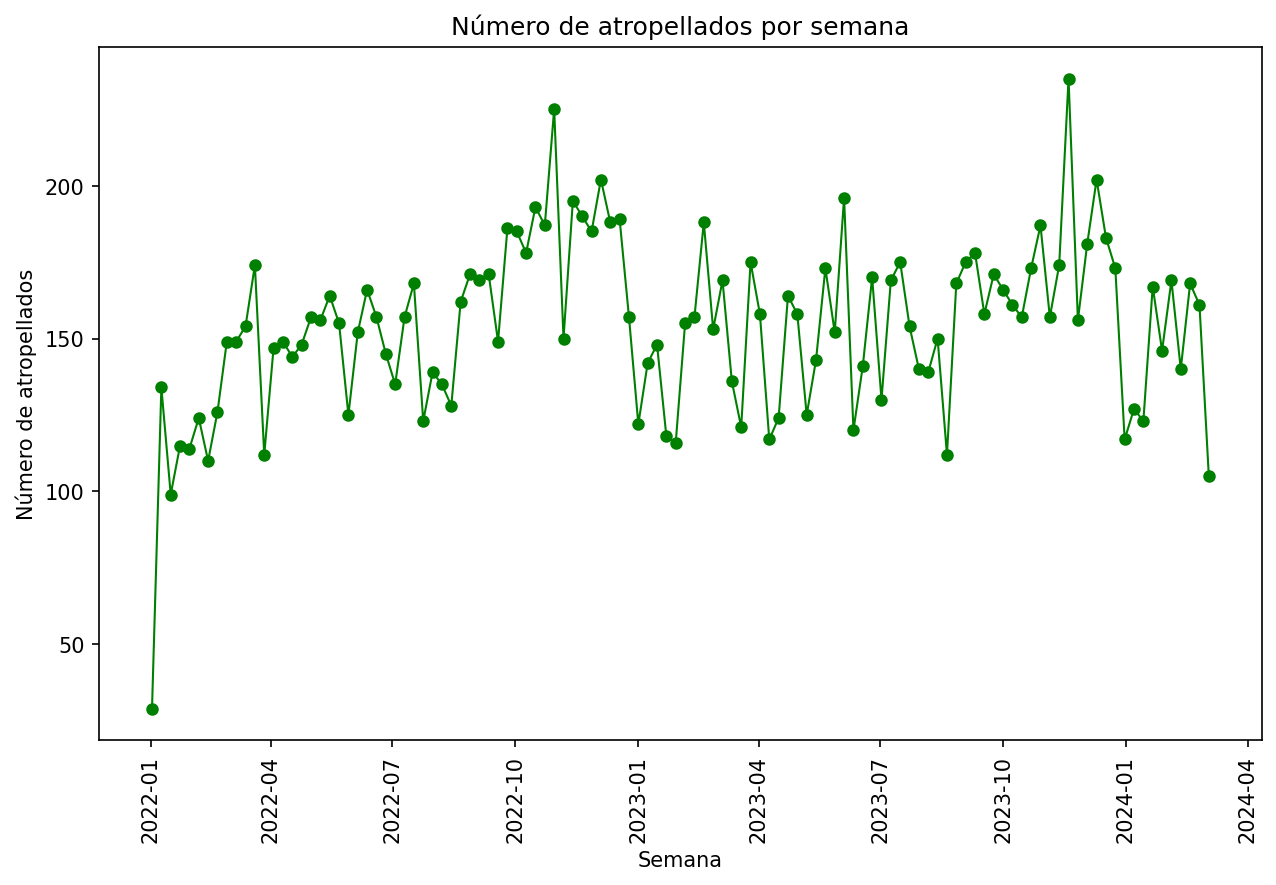

In [343]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(atropellados_por_semana, lw=1, color = 'green', marker= 'o', markersize=5)
plt.title('Número de atropellados por semana')
plt.xlabel('Semana')
plt.ylabel('Número de atropellados')
plt.tick_params(axis='x', rotation=90)
plt.show()


## e) Obtenga un mapa de calor (HeatMap) que muestre la ubicación geográfica de los reportes de personas atropelladas, utilizando las coordenadas de latitud y longitud asociadas a cada incidente.

In [344]:

df_atropellados = df[filtro]


In [345]:
# se deben eliminar filas con latitud y longitud faltante o cero

df_atropellados = df_atropellados.dropna(subset=['latitud', 'longitud'])
df_atropellados = df_atropellados[(df_atropellados['latitud'] != 0) & (df_atropellados['longitud'] != 0)]

In [346]:
import folium

In [347]:
# Se crea una lista de coordenadas para el HeatMap

coordenadas = df_atropellados[['latitud', 'longitud']].values.tolist()


In [400]:
from folium.plugins import HeatMap
import folium

# se crea el mapa iniciando en la CDMX
mapa = folium.Map(location= [19.4, -99.1], zoom_start=11, tiles = 'Cartodb Positron')

# se agrega el HeatMap al mapa
HeatMap(coordenadas, raidus=7, blur=15, min_opacity=0.2).add_to(mapa)
# se muestra el mapa
mapa

## Ejercicio 2
Extraiga las tabla de "Terremotos de mayor magnitud" del siguiente enlace:

https://es.wikipedia.org/wiki/Anexo:Terremotos_de_mayor_magnitud

y realice lo siguiente:

In [349]:
# pip install lxml

In [350]:
import lxml

In [351]:
ruta = 'https://es.wikipedia.org/wiki/Anexo:Terremotos_de_mayor_magnitud'

tablas = pd.read_html(ruta)

tablas

[                                                       Visualiza un mapa con todas las coordenadas
   Sitúa todas las coordenadas utilizando OpenStreetMap Sitúa hasta 200 coordenadas utilizando Bing
 0       Exporta todas las coordenadas en formato KML                                              
 1    Exporta todas las coordenadas en formato GeoRSS                                              
 2       Exporta todas las coordenadas en formato GPX                                              
 3  Sitúa en el mapa todas las coordenadas microfo...                                              ,
     N.º                 Fecha y hora UTC          Magnitud  \
 0     1        22 de mayo de 1960, 15:11    9,5 MW[2]​[3]​   
 1     2   26 de diciembre de 2004, 00:58        9,3 MW[5]​   
 2     2       28 de marzo de 1964, 03:36    9,2 MW[3]​[7]​   
 3     4       11 de marzo de 2011, 05:46        9,1 MW[9]​   
 4     4    4 de noviembre de 1952, 16:58  9,0 MW[11]​[12]​   
 5     4      13 de a

In [352]:
len(tablas)

3

In [353]:
df0 = tablas[0]
df0

Visualiza un mapa con todas las coordenadas
  Sitúa todas las coordenadas utilizando OpenStreetMap Sitúa hasta 200 coordenadas utilizando Bing
0       Exporta todas las coordenadas en formato KML                                              
1    Exporta todas las coordenadas en formato GeoRSS                                              
2       Exporta todas las coordenadas en formato GPX                                              
3  Sitúa en el mapa todas las coordenadas microfo...

In [354]:
tablas[1]

N.º                 Fecha y hora UTC          Magnitud  \
0     1        22 de mayo de 1960, 15:11    9,5 MW[2]​[3]​   
1     2   26 de diciembre de 2004, 00:58        9,3 MW[5]​   
2     2       28 de marzo de 1964, 03:36    9,2 MW[3]​[7]​   
3     4       11 de marzo de 2011, 05:46        9,1 MW[9]​   
4     4    4 de noviembre de 1952, 16:58  9,0 MW[11]​[12]​   
5     4      13 de agosto de 1868, 21:30       9,0 MW[15]​   
6     4     28 de octubre de 1746, 22:30            9,0 MW   
7     4       26 de enero de 1700, 21:30            9,0 MW   
8     9     27 de febrero de 2010, 03:34            8,8 MW   
9     9       31 de enero de 1906, 15:36       8,8 MW[21]​   
10    9   25 de noviembre de 1833, 20:00            8,8 MW   
11   12    1 de noviembre de 1755, 10:16  8,7 MW[26]​[27]​   
12   12        8 de julio de 1730, 04:45            8,7 Mw   
13   12     14 de febrero de 1619, 11:30            8,7 Mw   
14   15       11 de abril de 2012, 15:38            8,6 MW   
15   15       28 de marzo de 2005, 23:09            8,6 MW   
16   15        9 de marzo de 1957, 14:22       8,6 MS[30]​   
17   15             15 de agosto de 1950            8,6 MW   
18   15   10 de noviembre de 1922, 23:53            8,6 MW   
19   15     19 de octubre de 1609, 19:00            8,6 MW   
20   15       28 de marzo de 1787, 11:30       8,6 MW[32]​   
21   22      3 de febrero de 1923, 04:58            8,5 MW   
22   22     20 de octubre de 1687, 09:15       8,5 MW[34]​   
23   22   16 de diciembre de 1575, 14:30            8,5 MW   
24   25  16 de septiembre de 2015, 19:54       8,4 MW[36]​   
25   25       23 de junio de 2001, 15:33       8,4 MW[37]​   
26   25                              NaN               NaN   

                                            Nombre  \
0                Terremoto de Valdivia de 1960[4]​   
1          Terremoto del océano Índico de 2004[6]​   
2              Terremoto de Alaska de 1964[7]​[8]​   
3       Terremoto y maremoto de Japón de 2011[10]​   
4    Terremoto de Kamchatka de 1952[11]​[13]​[14]​   
5             Terremoto de Arica de 1868[15]​[16]​   
6                        Terremoto de Lima de 1746   
7                    Terremoto de Cascadia de 1700   
8   Terremoto de Chile de 2010[17]​[18]​[19]​[20]​   
9     Terremoto de Ecuador y Colombia de 1906[22]​   
10     Terremoto de Sumatra de 1833[23]​[24]​[25]​   
11                Terremoto de Lisboa de 1755[28]​   
12            Terremoto de Valparaíso de 1730[29]​   
13                   Terremoto de Trujillo de 1619   
14             Terremoto del océano Índico de 2012   
15                    Terremoto de Sumatra de 2005   
16        Terremoto de las islas Andreanof de 1957   
17                      Terremoto de Assam de 1950   
18              Terremoto de Vallenar de 1922[31]​   
19             Terremotos de Lima y Callao de 1609   
20               Terremoto de Nueva España de 1787   
21             Terremoto de Kamchatka de 1923[33]​   
22             Terremotos de Lima y Callao de 1687   
23              Terremoto de Valdivia de 1575[35]​   
24                   Terremoto de Coquimbo de 2015   
25              Terremoto del sur del Perú de 2001   
26                                             NaN   

                                                 País  \
0                                               Chile   
1                                           Indonesia   
2                                      Estados Unidos   
3                                               Japón   
4                      Unión Soviética (actual Rusia)   
5                                 Perú (actual Chile)   
6   Virreinato del Perú, parte del Imperio español...   
7   Noroeste del Pacífico, parte del Imperio britá...   
8                                               Chile   
9                                   Ecuador  Colombia   
10  Indias Orientales Neerlandesas (actual Indonesia)   
11                Reino de Portugal (actual Portugal)   
12  Capitanía

se trabajará con la tablas[1] ya que es la que contiene las columnas que se piden

In [355]:
df1=tablas[1]

In [356]:
df1['Fecha y hora UTC'] = df1['Fecha y hora UTC'].astype(str)


In [357]:
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3,
    'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9,
    'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

Se asegura que todas tenga hora, añadiendo '00:00' en caso que no la tengan

In [358]:
fechas = df1['Fecha y hora UTC'].astype(str).str.lower().str.strip()


In [359]:
df1['Dia'] = fechas.str.extract(r'(\d{1,2}) de')[0]
df1['Mes_nombre'] = fechas.str.extract(r'de (\w+) de')[0]
df1['Año'] = fechas.str.extract(r'de (\d{4})')[0]
df1['Hora'] = fechas.str.extract(r', (\d{1,2}:\d{2})')[0]

In [360]:
df1['Hora'] = df1['Hora'].fillna('00:00')

In [370]:
df1['Mes_nombre'] = df1['Mes_nombre'].str.replace(r'\s+', '', regex=True).str.lower()
df1['Mes'] = df1['Mes_nombre'].map(meses)

In [371]:
df1['Año'] =pd.to_numeric(df1['Año'], errors='coerce')
df1['Mes'] =pd.to_numeric(df1['Mes'], errors='coerce')
df1['Dia'] =pd.to_numeric(df1['Dia'], errors='coerce')

In [384]:
df = df1[['Año', 'Mes', 'Dia', 'Hora', 'Magnitud', 'Muertes', 'País']].sort_values(by='Año', ascending=True)

df.head(13)

Año   Mes   Dia   Hora          Magnitud           Muertes  \
23  1575.0  12.0  16.0  14:30            8,5 MW              1221   
19  1609.0  10.0  19.0  19:00            8,6 MW               200   
13  1619.0   2.0  14.0  11:30            8,7 Mw               550   
22  1687.0  10.0  20.0  09:15       8,5 MW[34]​              5000   
7   1700.0   1.0  26.0  21:30            9,0 MW         Sin datos   
12  1730.0   7.0   8.0  04:45            8,7 Mw               300   
6   1746.0  10.0  28.0  22:30            9,0 MW   15 000 a 20 000   
11  1755.0  11.0   1.0  10:16  8,7 MW[26]​[27]​  60 000 a 100 000   
20  1787.0   3.0  28.0  11:30       8,6 MW[32]​                11   
10  1833.0  11.0  25.0  20:00            8,8 MW         Sin datos   
5   1868.0   8.0  13.0  21:30       9,0 MW[15]​               693   
9   1906.0   1.0  31.0  15:36       8,8 MW[21]​              1500   
18  1922.0  11.0  10.0  23:53            8,6 MW              1500   

                                                 País  
23  Capitanía General de Chile, parte del Imperio ...  
19  Virreinato del Perú, parte del Imperio español...  
13  Virreinato del Perú, parte del Imperio español...  
22  Virreinato del Perú, parte del Imperio español...  
7   Noroeste del Pacífico, parte del Imperio britá...  
12  Capitanía General de Chile, parte del Imperio ...  
6   Virreinato del Perú, parte del Imperio español...  
11                Reino de Portugal (actual Portugal)  
20  Virreinato de Nueva España, parte del Imperio ...  
10  Indias Orientales Neerlandesas (actual Indonesia)  
5                                 Perú (actual Chile)  
9                                   Ecuador  Colombia  
18                                   Chile  Argentina

## b) Obtenga un gráfico de barras que ilustre el año del terremoto y su magnitud.

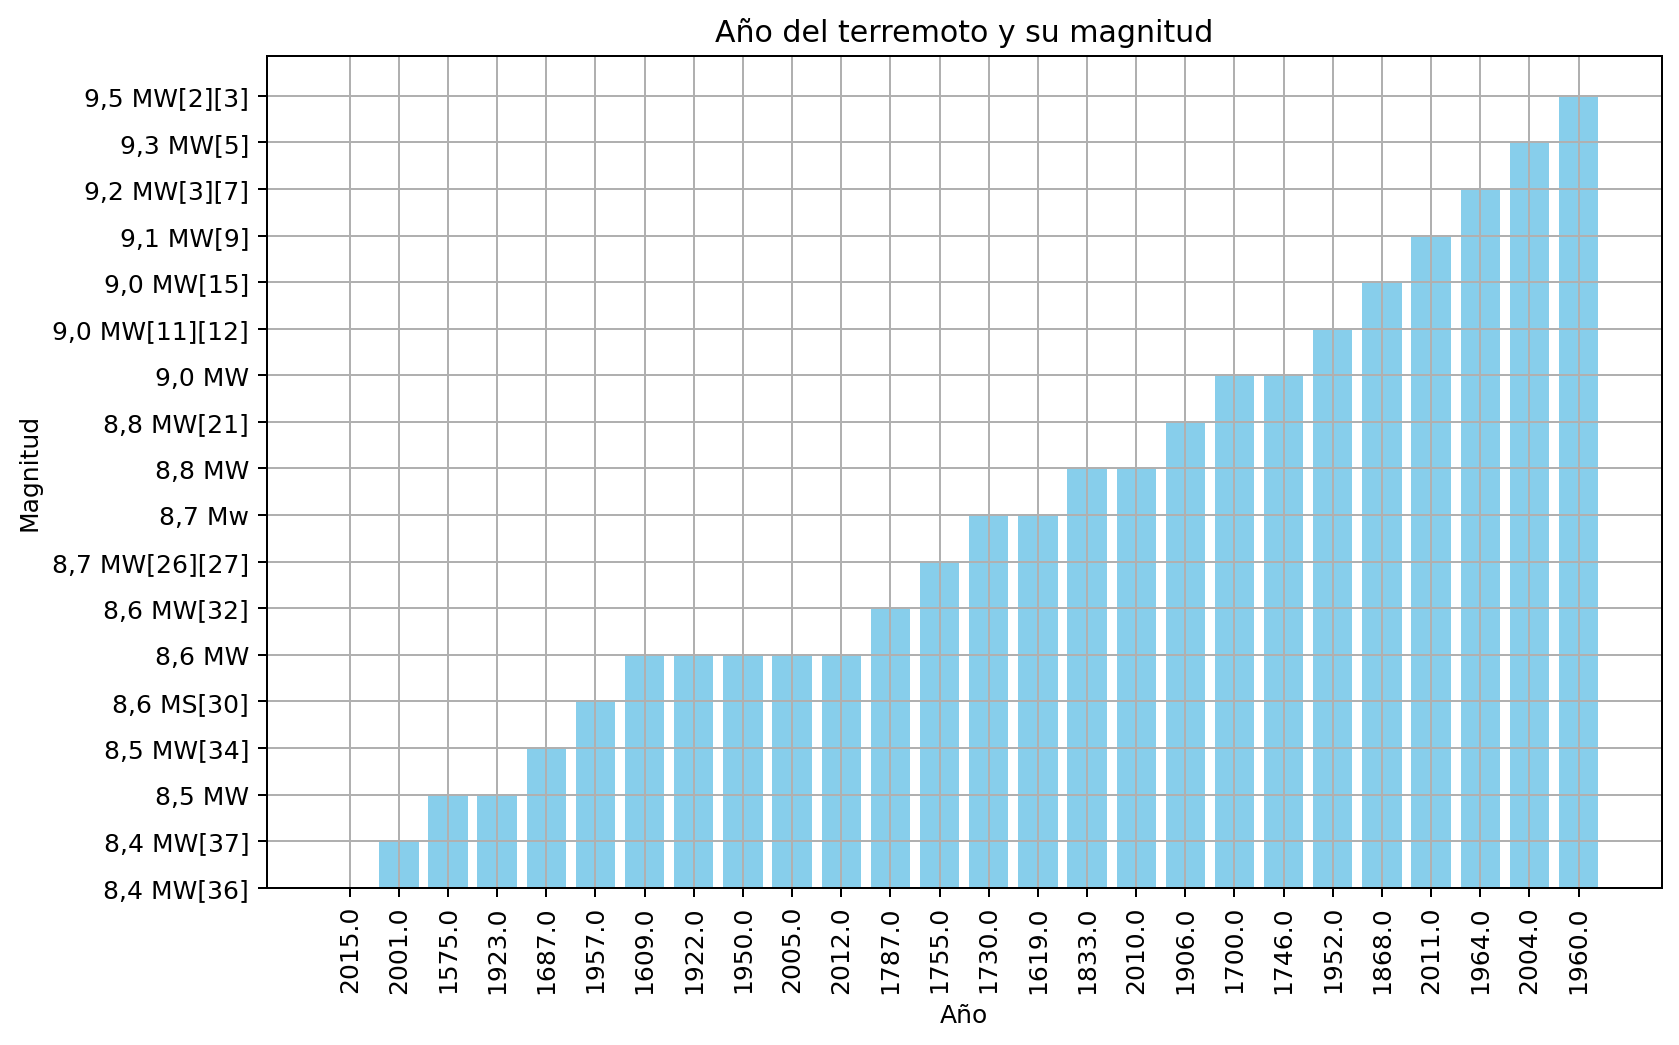

In [394]:

# se eliminan filas con valores NaN en 'Año' y 'Magnitud'
df1_filtrado = df1.dropna(subset=['Año', 'Magnitud'])



df1_ordenados=df1_filtrado.sort_values(by='Magnitud')

plt.figure(figsize=(10, 6), dpi=180)
plt.bar(df1_ordenados['Año'].astype(str), df1_ordenados['Magnitud'], color= 'skyblue')
plt.title('Año del terremoto y su magnitud')
plt.xlabel('Año')
plt.ylabel('Magnitud')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## c) ¿Cuándo y dónde ocurrió el terremoto de mayor magnitud en la historia?



In [398]:
df_1960 = df1[df1['Año'] == 1960]
df_1960

N.º           Fecha y hora UTC        Magnitud  \
0    1  22 de mayo de 1960, 15:11  9,5 MW[2]​[3]​   

                              Nombre   País  \
0  Terremoto de Valdivia de 1960[4]​  Chile   

                                 Lugar y coordenadas      Muertes   Dia  \
0  Valdivia, Región de los Ríos38°14′24″S 73°3′0″...  1655 a 2000  22.0   

  Mes_nombre     Año   Hora  Mes  
0       mayo  1960.0  15:11  5.0

El terremoto con mayor magnitud ocurrió en el año 1960 en Valdivia, Chile